In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

# Cleaning the data

The owners of Cafe Casa Martinez input and store their data in excel, so I need to clean and format the data before it can be used. They have three main databases: the rain database, which contains daily rainfall totals, the production database, which contains yearly coffee production totals, and the lots database, which contains information about the age and number of crops on each of their lots or fields.

# Rain

I'll start by cleaning the rain database. This file contains daily rainfall totals on the farm in millimeters (mm) from late October 2006 until the present day.

# Note to Patrick

If there comes a time in the future when Cafe Casa Martinez has both sown and renewed a lot the calculation for number of plants producing in a given year may break. I don't know how this information will be captured in their database yet so I can't build a solution at this point. I will need to figure it out then. See the [cells below](http://localhost:8888/notebooks/clean_data.ipynb#Number-of-plants-producing-calculation) that handle the calculation of the number of plants producing per year.

In [2]:
rain = pd.read_excel('data/CONTROL_DE_LLUVIAS-1_hasta_2022.xlsx', sheet_name=0, header=3)

Load the excel sheet as a pandas dataframe, ignoring the first three header rows. Next, rename the columns that failed to automatically be automatically named by pandas.

In [3]:
rain = rain.rename(columns={'MES/DIA':'month', 'TOTAL':'total'})

In [4]:
rain

,month,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,total
0,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OCTUBRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,7,7,0,8.0,22.0
2,NOVIEMBRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,6.0,2.0,3.0,0,0,0,7,0,0.0,187.0
3,DICIEMBRE,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,8.0,...,0.0,0.0,0.0,0,0,0,0,0,0.0,78.0
4,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,NOVIEMBRE,0.0,12.0,4.0,0.0,0.0,9.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,NaN,127.0
228,DICIEMBRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0,0,0,0,0,0.0,4.0
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1726.0
230,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next, drop rows that have both a year in the month column and nan in all rows. Finally, and add a column for the year.

In [5]:
# find the rows where the month is a year
row_is_a_year_inds = rain.loc[np.isnan(rain.month.str.isnumeric().astype(float))].index

In [6]:
# fill the rows between row_is_a_year_inds with the appropriate year
for i in range(len(row_is_a_year_inds)-1):
    rain.loc[row_is_a_year_inds[i]:row_is_a_year_inds[i+1]-1, 'year'] = rain.loc[row_is_a_year_inds, 'month'].values[i]
rain.loc[row_is_a_year_inds[i+1]:, 'year'] = rain.loc[row_is_a_year_inds, 'month'].values[i+1]

In [7]:
rain = rain.drop(index=row_is_a_year_inds)

In [8]:
rain

,month,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,total,year
1,OCTUBRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,7,7,0,8.0,22.0,2006.0
2,NOVIEMBRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,2.0,3.0,0,0,0,7,0,0.0,187.0,2006.0
3,DICIEMBRE,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,8.0,...,0.0,0.0,0,0,0,0,0,0.0,78.0,2006.0
5,ENERO,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,9,0,0,0,0,0.0,18.0,2007.0
6,FEBRERO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,...,0.0,3.0,0,0,0,0,0,0.0,32.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,SEPTIEMBRE,8.0,15.0,20.0,0.0,4.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0,0,0,11,45,NaN,194.0,2022.0
226,OCTUBRE,0.0,0.0,0.0,19.0,0.0,18.0,3.0,4.0,29.0,...,7.0,0.0,0,24,0,0,0,0.0,178.0,2022.0
227,NOVIEMBRE,0.0,12.0,4.0,0.0,0.0,9.0,5.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,NaN,127.0,2022.0
228,DICIEMBRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0,0,0,0,0,0.0,4.0,2022.0


Finally, translate the months from spanish to english.

In [9]:
rain['month'] = rain['month'].map({'ENERO':'jan',
                     'FEBRERO':'feb',
                     'MARZO':'mar',
                     'ABRIL':'apr',
                     'MAYO':'may',
                     'JUNIO':'jun',
                     'JULIO':'jul',
                     'AGOSTO':'aug',
                     'SEPTIEMBRE':'sep',
                     'OCTUBRE':'oct',
                     'NOVIEMBRE':'nov',
                     'DICIEMBRE':'dec'})

In [10]:
rain.columns = rain.columns.astype(str)

In [11]:
rain.columns

Index(['month', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', 'total', 'year'],
      dtype='object')

In [12]:
rain.month.unique()

array(['oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'may', 'jun',
       'jul', 'aug', 'sep'], dtype=object)

In [13]:
rain.year.unique()

array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022., 2023.])

In [14]:
# make the month a categorical column so when we group by year and month later the data stays in chronological order.
rain['month'] = pd.Categorical(rain['month'], ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

In [15]:
rain

,month,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,total,year
1,oct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,7,7,0,8.0,22.0,2006.0
2,nov,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,2.0,3.0,0,0,0,7,0,0.0,187.0,2006.0
3,dec,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,8.0,...,0.0,0.0,0,0,0,0,0,0.0,78.0,2006.0
5,jan,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,9,0,0,0,0,0.0,18.0,2007.0
6,feb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,...,0.0,3.0,0,0,0,0,0,0.0,32.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,sep,8.0,15.0,20.0,0.0,4.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0,0,0,11,45,NaN,194.0,2022.0
226,oct,0.0,0.0,0.0,19.0,0.0,18.0,3.0,4.0,29.0,...,7.0,0.0,0,24,0,0,0,0.0,178.0,2022.0
227,nov,0.0,12.0,4.0,0.0,0.0,9.0,5.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,NaN,127.0,2022.0
228,dec,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0,0,0,0,0,0.0,4.0,2022.0


In [16]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 231
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   month   196 non-null    category
 1   1       196 non-null    float64 
 2   2       196 non-null    float64 
 3   3       196 non-null    float64 
 4   4       196 non-null    float64 
 5   5       196 non-null    float64 
 6   6       196 non-null    float64 
 7   7       196 non-null    float64 
 8   8       196 non-null    float64 
 9   9       196 non-null    float64 
 10  10      196 non-null    float64 
 11  11      196 non-null    float64 
 12  12      196 non-null    float64 
 13  13      196 non-null    float64 
 14  14      196 non-null    float64 
 15  15      196 non-null    float64 
 16  16      196 non-null    float64 
 17  17      196 non-null    float64 
 18  18      196 non-null    float64 
 19  19      196 non-null    float64 
 20  20      196 non-null    float64 
 21  21      196 non-

In [17]:
rain.loc[rain.month=='feb']

,month,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,total,year
6,feb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,...,0.0,3.0,0,0,0,0,0,0.0,32.0,2007.0
20,feb,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,1.0,0,0,0,0,NaN,NaN,49.0,2008.0
34,feb,0.0,2.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0,...,8.0,11.0,0,31,2,NaN,NaN,NaN,85.0,2009.0
48,feb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,...,0.0,1.0,0,0,0,NaN,NaN,NaN,36.0,2010.0
62,feb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1,0,19,NaN,NaN,NaN,51.0,2011.0
76,feb,0.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,NaN,NaN,9.0,2012.0
91,feb,0.0,18.0,0.0,0.0,3.0,0.0,0.0,8.0,0.0,...,0.0,1.0,0,0,8,NaN,NaN,NaN,49.0,2013.0
106,feb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5,0,8,NaN,NaN,NaN,17.0,2014.0
120,feb,4.0,9.0,0.0,4.0,23.0,5.0,7.0,7.0,0.0,...,0.0,0.0,0,0,2,NaN,NaN,NaN,61.0,2015.0
134,feb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0,0,0,0,NaN,NaN,110.0,2016.0


There are missing data in the rain dataframe. Looking at October 2006, data was not collected until the 25th of the month, so one nan point per column between 1-24 is due to that. February only has 28 days, some of which are stored as nan and some are stored as 0. Likewise, September, April, June, and November only have 30 days. I will fill replace each of these nan values with 0, after checking that there was no data accidentally added for these days (there was not).

In [18]:
rain.loc[rain.month=='feb', ['29', '30', '31']] = 0
rain.loc[rain.month=='apr', ['31']] = 0
rain.loc[rain.month=='jun', ['31']] = 0
rain.loc[rain.month=='sep', ['31']] = 0
rain.loc[rain.month=='nov', ['31']] = 0

In [19]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 231
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   month   196 non-null    category
 1   1       196 non-null    float64 
 2   2       196 non-null    float64 
 3   3       196 non-null    float64 
 4   4       196 non-null    float64 
 5   5       196 non-null    float64 
 6   6       196 non-null    float64 
 7   7       196 non-null    float64 
 8   8       196 non-null    float64 
 9   9       196 non-null    float64 
 10  10      196 non-null    float64 
 11  11      196 non-null    float64 
 12  12      196 non-null    float64 
 13  13      196 non-null    float64 
 14  14      196 non-null    float64 
 15  15      196 non-null    float64 
 16  16      196 non-null    float64 
 17  17      196 non-null    float64 
 18  18      196 non-null    float64 
 19  19      196 non-null    float64 
 20  20      196 non-null    float64 
 21  21      196 non-

There are still missing values in columns 30 and 31 so I will investigate.

In [20]:
rain[rain['31'].isna()]

,month,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,total,year
70,oct,0.0,2.0,0.0,0.0,1.0,5.0,14.0,5.0,0.0,...,2.0,0.0,1,0,25,0,5,NaN,140.0,2011.0
92,mar,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0,0,0,0,15,NaN,63.0,2013.0
128,oct,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,22.0,0,4,0,13,NaN,NaN,84.0,2015.0
139,jul,0.0,9.0,0.0,0.0,0.0,20.0,3.0,0.0,0.0,...,2.0,0.0,0,32,0,0,6,NaN,142.0,2016.0
154,aug,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,4,12,0,3,0,NaN,63.0,2017.0
156,oct,0.0,8.0,12.0,0.0,0.0,1.0,0.0,2.0,15.0,...,0.0,2.0,0,2,0,12,0,NaN,83.0,2017.0
165,may,6.0,3.0,30.0,2.0,6.0,15.0,32.0,31.0,1.0,...,12.0,5.0,0,22,3,2,2,NaN,240.0,2018.0
167,jul,2.0,13.0,0.0,0.0,3.0,14.0,0.0,0.0,19.0,...,12.0,22.0,15,26,0,5,3,NaN,189.0,2018.0
184,oct,0.0,0.0,4.0,2.0,0.0,0.0,7.0,5.0,0.0,...,5.0,0.0,0,0,0,0,NaN,NaN,122.0,2019.0
186,dec,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,7,0,0,0,NaN,NaN,29.0,2019.0


There is no way to recover what the true rainfall may have been on these missing days because the farm is at a higher altitude and therefore different climate than the nearest weather station with data available on the internet. so I will fill these missing values with 0. I still prefer to keep october 1-24 2006 as nan because data was not yet collected on these dates.

In [21]:
rain.loc[rain['31'].isna(), ['31']] = 0
rain.loc[rain['30'].isna(), ['30']] = 0

In [22]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 231
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   month   196 non-null    category
 1   1       196 non-null    float64 
 2   2       196 non-null    float64 
 3   3       196 non-null    float64 
 4   4       196 non-null    float64 
 5   5       196 non-null    float64 
 6   6       196 non-null    float64 
 7   7       196 non-null    float64 
 8   8       196 non-null    float64 
 9   9       196 non-null    float64 
 10  10      196 non-null    float64 
 11  11      196 non-null    float64 
 12  12      196 non-null    float64 
 13  13      196 non-null    float64 
 14  14      196 non-null    float64 
 15  15      196 non-null    float64 
 16  16      196 non-null    float64 
 17  17      196 non-null    float64 
 18  18      196 non-null    float64 
 19  19      196 non-null    float64 
 20  20      196 non-null    float64 
 21  21      196 non-

# Dtype casting
Finally I'll cast all dtypes as int16 to save physical space in our hard drive as well as because it's faster.

In [23]:
rain.loc[:, rain.columns[1:]] = rain.loc[:, rain.columns[1:]].astype('int16')

C:\Users\pdrew\AppData\Local\Temp\ipykernel_24044\1500933825.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  rain.loc[:, rain.columns[1:]] = rain.loc[:, rain.columns[1:]].astype('int16')


In [24]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 231
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   month   196 non-null    category
 1   1       196 non-null    int16   
 2   2       196 non-null    int16   
 3   3       196 non-null    int16   
 4   4       196 non-null    int16   
 5   5       196 non-null    int16   
 6   6       196 non-null    int16   
 7   7       196 non-null    int16   
 8   8       196 non-null    int16   
 9   9       196 non-null    int16   
 10  10      196 non-null    int16   
 11  11      196 non-null    int16   
 12  12      196 non-null    int16   
 13  13      196 non-null    int16   
 14  14      196 non-null    int16   
 15  15      196 non-null    int16   
 16  16      196 non-null    int16   
 17  17      196 non-null    int16   
 18  18      196 non-null    int16   
 19  19      196 non-null    int16   
 20  20      196 non-null    int16   
 21  21      196 non-

Our dataframe is now 14.7 KB in memory instead of 52.6+ and we didn't lose any information.

## Exploratory data analysis

Let's make a bar plot showing the mean rainfall totals across all years in each month with the standard error on each mean.

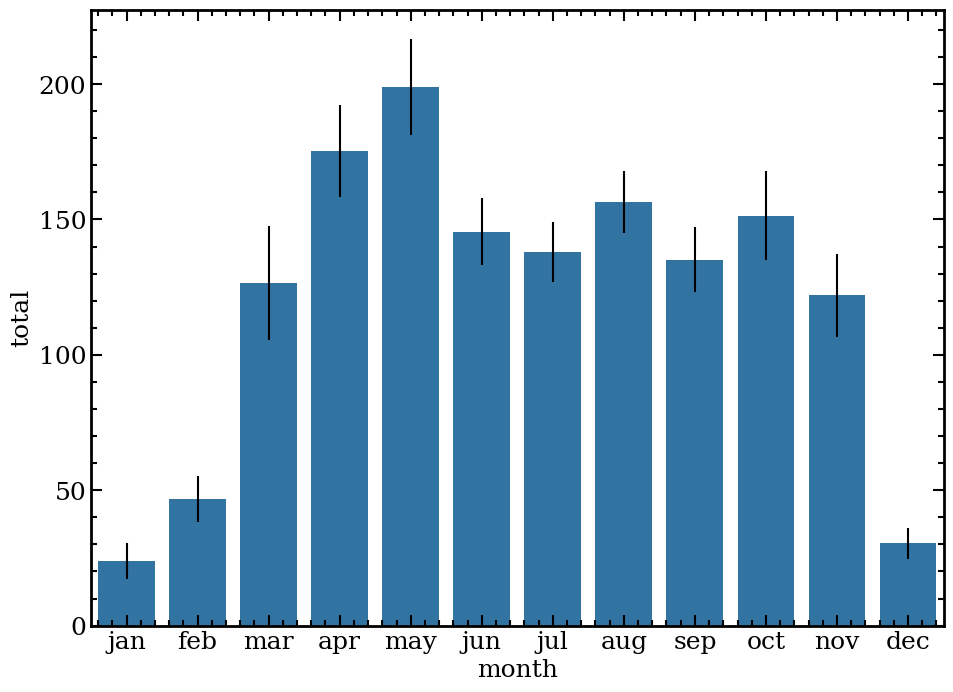

In [25]:
plt.figure(figsize=(11,8), dpi=100)
sns.barplot(y=rain.groupby('month')['total'].mean(), x=rain.groupby('month')['total'].mean().index, 
           order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
           color='tab:blue',
           yerr=rain.groupby('month')['total'].sem());

We can see a clear wet-dry climate pattern where winter is dry and rainfall peaks in the month of May.

# Production

Next I will work with the coffee production dataset. This has columns of year, production in cargas, or loads of 125 kg, and production in kg.

In [26]:
prod = pd.read_excel('data/PRODUCCION_CAFE.xlsx', header=1)

In [27]:
prod

,AÑO,Unnamed: 1,CANTIDAD,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2008,NaN,14.80,cargas de 125 kg,NaN,1850.00,KG
1,2009,NaN,11.21,"""",NaN,1401.25,KG
2,2010,NaN,15.45,"""",NaN,1931.25,KG
3,2011,NaN,19.03,"""",NaN,2378.75,KG
4,2012,NaN,7.00,"""",NaN,875.00,KG
5,2013,NaN,20.91,"""",NaN,2613.75,KG
6,2014,NaN,25.52,"""",NaN,3190.00,KG
7,2015,NaN,24.40,"""",NaN,3050.00,KG
8,2016,NaN,35.53,"""",NaN,4441.25,KG
9,2017,NaN,44.55,"""",NaN,5568.75,KG


In [28]:
prod = prod.drop(['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 6'], axis=1)

In [29]:
prod.columns = ['year', 'prod_cargas', 'prod_kg']

In [30]:
prod

,year,prod_cargas,prod_kg
0,2008,14.80,1850.00
1,2009,11.21,1401.25
2,2010,15.45,1931.25
3,2011,19.03,2378.75
4,2012,7.00,875.00
5,2013,20.91,2613.75
6,2014,25.52,3190.00
7,2015,24.40,3050.00
8,2016,35.53,4441.25
9,2017,44.55,5568.75


In [31]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         15 non-null     int64  
 1   prod_cargas  15 non-null     float64
 2   prod_kg      15 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 488.0 bytes


In [32]:
prod['year'] = prod['year'].astype('int16')
prod['prod_cargas'] = prod['prod_cargas'].astype('float32')
prod['prod_kg'] = prod['prod_kg'].astype('float32')

In [33]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         15 non-null     int16  
 1   prod_cargas  15 non-null     float32
 2   prod_kg      15 non-null     float32
dtypes: float32(2), int16(1)
memory usage: 278.0 bytes


There are no missing datapoints in this dataframe. Casting the dtypes as int16 and float32 reduces the file size by a factor of 2 while losing no information.

## Exploratory data analysis

Let's make a scatter plot showing production in kg versus year.

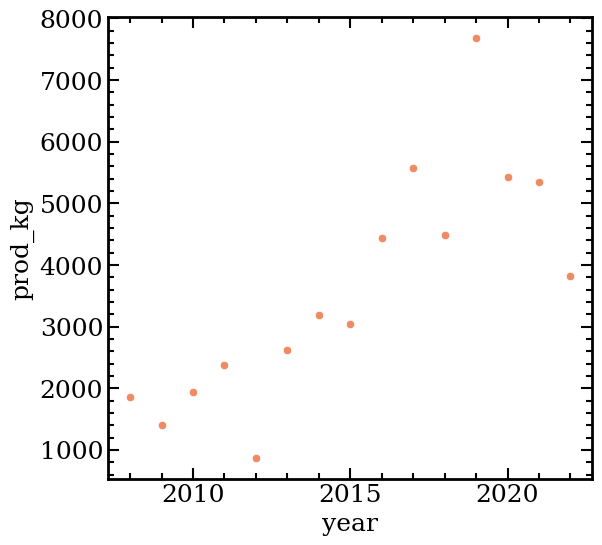

In [34]:
plt.figure(dpi=100)
sns.scatterplot(data=prod, x='year', y='prod_kg');

Production is increasing as a function of year. We will investigate the causes of this later with a focus on the cause of this increase and we will see if there is anything we can do to increase production in years to come.

# Coffee Lots

Next, I will clean the coffee lots database. The columns in the excel spreadsheet are: lot number, lot name, month and year of sowing, month and year of plant renewal, variety of coffee plant in each lot, number of plants per lot, distance in meters between planting in rows and columns, and area in meters between plants.

In [35]:
lots = pd.read_excel('data/INVENTARIO_DE_CAFETALES.xlsx', header=1)

In [36]:
lots

,Unnamed: 0,Unnamed: 1,MES,AÑO,MES.1,AÑO.1,Unnamed: 6,Unnamed: 7,(b) CALLES (metros),X,(c) SURCOS (metros),Unnamed: 11
0,1,CEIBA 1,NaN,NaN,2.0,2019.0,CASTILLO,925,1.4,NaN,1.2,0.155400
1,2,CEIBA 3,6.0,2015.0,NaN,NaN,CASTILLO,900,1.4,NaN,1.2,0.151200
2,3,CEIBA 4,1.0,2016.0,NaN,NaN,TABI,243,3.0,NaN,3.0,0.218700
3,3a,CEIBA 4a,7.0,2021.0,NaN,NaN,CENICAFE-1,1155,1.5,NaN,1.1,0.190575
4,4,CEDRAL,7.0,2021.0,NaN,NaN,CENICAFE-1,2025,1.5,NaN,1.1,0.334125
5,5,ANACOS 1,NaN,NaN,2.0,2019.0,CASTILLO,2487,1.4,NaN,1.2,0.417816
6,6,ANACOS 2,NaN,NaN,2.0,2018.0,CASTILLO,680,1.4,NaN,1.2,0.114240
7,7,LA HOYA,NaN,NaN,1.0,2018.0,CASTILLO,1130,1.4,NaN,1.2,0.189840
8,7a,LA HOYA,NaN,NaN,2.0,2021.0,CASTILLO,300,1.4,NaN,1.2,0.050400
9,8,LAS PIEDRAS,NaN,NaN,2.0,2020.0,CASTILLO,1030,1.4,NaN,1.2,0.173040


In [37]:
lots = lots.rename(columns={lots.columns[0]:'lot_number',
                     lots.columns[1]:'lot_name',
                     lots.columns[2]:'sow_month',
                     lots.columns[3]:'sow_year',
                     lots.columns[4]:'cut_month',
                     lots.columns[5]:'cut_year',
                     lots.columns[6]:'variety',
                     lots.columns[7]:'n_plants',
                     lots.columns[8]:'planting_distance_streets_meters',
                     lots.columns[10]:'planting_distance_grooves_meters',
                     lots.columns[11]:'area_in_sq_meters'})

lots.drop(columns='X', index=0, inplace=True)
lots.reset_index(inplace=True, drop=True)

In [38]:
lots

,lot_number,lot_name,sow_month,sow_year,cut_month,cut_year,variety,n_plants,planting_distance_streets_meters,planting_distance_grooves_meters,area_in_sq_meters
0,2,CEIBA 3,6.0,2015.0,NaN,NaN,CASTILLO,900,1.4,1.2,0.151200
1,3,CEIBA 4,1.0,2016.0,NaN,NaN,TABI,243,3.0,3.0,0.218700
2,3a,CEIBA 4a,7.0,2021.0,NaN,NaN,CENICAFE-1,1155,1.5,1.1,0.190575
3,4,CEDRAL,7.0,2021.0,NaN,NaN,CENICAFE-1,2025,1.5,1.1,0.334125
4,5,ANACOS 1,NaN,NaN,2.0,2019.0,CASTILLO,2487,1.4,1.2,0.417816
5,6,ANACOS 2,NaN,NaN,2.0,2018.0,CASTILLO,680,1.4,1.2,0.114240
6,7,LA HOYA,NaN,NaN,1.0,2018.0,CASTILLO,1130,1.4,1.2,0.189840
7,7a,LA HOYA,NaN,NaN,2.0,2021.0,CASTILLO,300,1.4,1.2,0.050400
8,8,LAS PIEDRAS,NaN,NaN,2.0,2020.0,CASTILLO,1030,1.4,1.2,0.173040
9,9,ARRAYANES,NaN,NaN,5.0,2015.0,CASTILLO,906,1.4,1.2,0.152208


In [39]:
lots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   lot_number                        14 non-null     object 
 1   lot_name                          14 non-null     object 
 2   sow_month                         6 non-null      float64
 3   sow_year                          6 non-null      float64
 4   cut_month                         8 non-null      float64
 5   cut_year                          8 non-null      float64
 6   variety                           14 non-null     object 
 7   n_plants                          14 non-null     int64  
 8   planting_distance_streets_meters  14 non-null     float64
 9   planting_distance_grooves_meters  14 non-null     float64
 10  area_in_sq_meters                 14 non-null     float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.3+ KB


There are missing data in this dataframe however they are appropriate. The month and year of sowing are not known for some lots as the plants were sown before the owners purchased the farm, and some lots have not been renewed yet, so there is no date for cut month/year.

In [40]:
lots['area_in_sq_meters'].astype('float32')

0     0.151200
1     0.218700
2     0.190575
3     0.334125
4     0.417816
5     0.114240
6     0.189840
7     0.050400
8     0.173040
9     0.152208
10    0.223200
11    0.461400
12    0.170400
13    0.750000
Name: area_in_sq_meters, dtype: float32

In [41]:
lots['lot_number'] = lots['lot_number'].astype('string')
lots['lot_name'] = lots['lot_name'].astype('string')
lots['sow_month'] = lots['sow_month'].astype('float32')
lots['sow_year'] = lots['sow_year'].astype('float32')
lots['cut_month'] = lots['cut_month'].astype('float32')
lots['cut_year'] = lots['cut_year'].astype('float32')
lots['variety'] = lots['variety'].astype('category')
lots['n_plants'] = lots['n_plants'].astype('int16')
lots['planting_distance_streets_meters'] = lots['planting_distance_streets_meters'].astype('float32')
lots['planting_distance_grooves_meters'] = lots['planting_distance_grooves_meters'].astype('float32')
lots['area_in_sq_meters'] = lots['area_in_sq_meters'].astype('float32')

In [42]:
lots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   lot_number                        14 non-null     string  
 1   lot_name                          14 non-null     string  
 2   sow_month                         6 non-null      float32 
 3   sow_year                          6 non-null      float32 
 4   cut_month                         8 non-null      float32 
 5   cut_year                          8 non-null      float32 
 6   variety                           14 non-null     category
 7   n_plants                          14 non-null     int16   
 8   planting_distance_streets_meters  14 non-null     float32 
 9   planting_distance_grooves_meters  14 non-null     float32 
 10  area_in_sq_meters                 14 non-null     float32 
dtypes: category(1), float32(7), int16(1), string(2)
memory usage

# Combine databases

Now that we have all three databases cleaned and formatted as pandas dataframes, it will be useful to combine some of the information between databases. Let's make a new dataframe that has columns of year, total number of plants, total production, production per plant, and each month's rainfall totals.

In [43]:
year_arr = np.linspace(prod.year.min(), prod.year.max(), prod.year.max()-prod.year.min()+1).astype(int)

df = pd.DataFrame(data=year_arr, columns=['year'])

df

,year
0,2008
1,2009
2,2010
3,2011
4,2012
5,2013
6,2014
7,2015
8,2016
9,2017


I want to engineer a new feature, which is the total number of plants producing in a given year. A new plant produces no coffee in the year it is sown or the year after, years 0 and 1. The production curve then increases with year until it peaks in year 4 before decreasing again. For this reason, in year 6 it is best practice to "renew" or zoca the plant, or to cut it at its base and let it regrow. The plant will then have no production in the year of renewal but will then follow a similar production curve to that of a new plant. I will use this information to calculate the number of plants producing in a given year based on the sowing and renewal information for each lot in the lots database.

In [44]:
tot_plants = pd.DataFrame(columns=year_arr, index=lots.index)
tot_plants

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Number of plants producing calculation

In [45]:
# for all lots:
for i in lots.index:
    # create an empty production array with an entry for each year
    prod_arr = np.zeros(len(year_arr))
    
    # if there was a renewal in a year, the year of the renewal has no plants producing, otherwise all years after produce
    if ~np.isnan(lots.loc[i, 'cut_year']):
        # create two arrays, one with the years that produce after zoca, one with the years that produce before zoca.
        # NOTE: if a lot has a cut year in the lots dataframe it has been producing since before the farm was purchased,
        # so all years produce except the year of renewal. This may not always be the case, but it's unclear how this 
        # data will be stored by Cafe Casa Martinez so I cannot yet build a script that accounts for the case where they both
        # planted and renewed a field.
        productive_years_post_zoca = np.arange(lots.loc[i, 'cut_year']+1, date.today().year)
        productive_years_pre_zoca = np.arange(year_arr[0], lots.loc[i, 'cut_year'])
        
        # fill productive years with 1
        prod_arr[np.isin(year_arr, productive_years_post_zoca)] = 1
        prod_arr[np.isin(year_arr, productive_years_pre_zoca)] = 1
    
    # if there was a sowing, years 0 and 1 have no production. All years after produce
    if ~np.isnan(lots.loc[i, 'sow_year']):
        productive_years_post_sow = np.arange(lots.loc[i, 'sow_year']+2, date.today().year)
        
        # fill productive years with 1
        prod_arr[np.isin(year_arr, productive_years_post_sow)] = 1
        
    # multiply prod_arr by the number of plants in the lot
    prod_arr = prod_arr * lots.loc[i, 'n_plants']
    
    # fill each year in the lots dataframe with the number of plants producing in each lot
    year_prod_inds_low = np.where(tot_plants.columns == year_arr[0])[0][0]
    year_prod_inds_high = np.where(tot_plants.columns == year_arr[-1])[0][0]+1
    tot_plants.iloc[i, year_prod_inds_low : year_prod_inds_high] = prod_arr

In [46]:
# manually set this year's renewed field to 0 production
tot_plants.loc[13, tot_plants.columns[-1]] = 0

In [47]:
tot_plants

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,900.0,900.0,900.0,900.0,900.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,243.0,243.0,243.0,243.0,243.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2487.0,2487.0,2487.0,2487.0,2487.0,2487.0,2487.0,2487.0,2487.0,2487.0,2487.0,0.0,2487.0,2487.0,2487.0
5,680.0,680.0,680.0,680.0,680.0,680.0,680.0,680.0,680.0,680.0,0.0,680.0,680.0,680.0,680.0
6,1130.0,1130.0,1130.0,1130.0,1130.0,1130.0,1130.0,1130.0,1130.0,1130.0,0.0,1130.0,1130.0,1130.0,1130.0
7,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,0.0,300.0
8,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,0.0,1030.0,1030.0
9,906.0,906.0,906.0,906.0,906.0,906.0,906.0,0.0,906.0,906.0,906.0,906.0,906.0,906.0,906.0


In [48]:
df['tot_plants'] = tot_plants.sum(axis=0).values

In [49]:
df['tot_prod_kg'] = prod.prod_kg
df['prod_per_plant_kg'] = df['tot_prod_kg']/df['tot_plants']

In [50]:
df

,year,tot_plants,tot_prod_kg,prod_per_plant_kg
0,2008,10745.0,1850.00,0.172173
1,2009,10745.0,1401.25,0.130409
2,2010,10745.0,1931.25,0.179735
3,2011,10745.0,2378.75,0.221382
4,2012,10745.0,875.00,0.081433
5,2013,12233.0,2613.75,0.213664
6,2014,17233.0,3190.00,0.18511
7,2015,16327.0,3050.00,0.186807
8,2016,17233.0,4441.25,0.257718
9,2017,18133.0,5568.75,0.307106


Next I want to add monthly rainfall total columns

In [51]:
monthly_rain_tots = rain.loc[rain.year >= 2008].groupby(['year','month']).sum()['total']
monthly_rain_tots

year  month
2008  jan       20
      feb       49
      mar       22
      apr       54
      may      268
              ... 
2023  aug        0
      sep        0
      oct        0
      nov        0
      dec        0
Name: total, Length: 192, dtype: int16

In [52]:
month_list = ['jan_rain_mm', 'feb_rain_mm', 'mar_rain_mm', 'apr_rain_mm', 'may_rain_mm', 'jun_rain_mm',
 'jul_rain_mm', 'aug_rain_mm', 'sep_rain_mm', 'oct_rain_mm', 'nov_rain_mm', 'dec_rain_mm']

for i in df.index:
    df.loc[i, month_list] = monthly_rain_tots.loc[year_arr[i]].values

In [53]:
df['tot_rain_mm'] = df.iloc[:, 4:].sum(axis=1)

In [54]:
df

,year,tot_plants,tot_prod_kg,prod_per_plant_kg,jan_rain_mm,feb_rain_mm,mar_rain_mm,apr_rain_mm,may_rain_mm,jun_rain_mm,jul_rain_mm,aug_rain_mm,sep_rain_mm,oct_rain_mm,nov_rain_mm,dec_rain_mm,tot_rain_mm
0,2008,10745.0,1850.00,0.172173,20.0,49.0,22.0,54.0,268.0,169.0,160.0,169.0,182.0,146.0,120.0,17.0,1376.0
1,2009,10745.0,1401.25,0.130409,44.0,85.0,262.0,191.0,55.0,138.0,62.0,205.0,50.0,115.0,151.0,55.0,1413.0
2,2010,10745.0,1931.25,0.179735,0.0,36.0,60.0,202.0,216.0,184.0,202.0,178.0,225.0,284.0,166.0,32.0,1785.0
3,2011,10745.0,2378.75,0.221382,3.0,51.0,208.0,307.0,200.0,126.0,146.0,133.0,129.0,140.0,142.0,67.0,1652.0
4,2012,10745.0,875.00,0.081433,15.0,9.0,301.0,261.0,147.0,151.0,130.0,174.0,142.0,252.0,80.0,16.0,1678.0
5,2013,12233.0,2613.75,0.213664,10.0,49.0,63.0,157.0,149.0,58.0,59.0,221.0,129.0,125.0,121.0,61.0,1202.0
6,2014,17233.0,3190.00,0.18511,4.0,17.0,46.0,149.0,185.0,91.0,103.0,175.0,98.0,201.0,107.0,26.0,1202.0
7,2015,16327.0,3050.00,0.186807,44.0,61.0,106.0,218.0,99.0,113.0,139.0,163.0,175.0,84.0,99.0,14.0,1315.0
8,2016,17233.0,4441.25,0.257718,21.0,110.0,25.0,153.0,279.0,87.0,142.0,86.0,80.0,139.0,101.0,37.0,1260.0
9,2017,18133.0,5568.75,0.307106,5.0,17.0,232.0,107.0,233.0,232.0,193.0,63.0,111.0,83.0,74.0,4.0,1354.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               15 non-null     int32  
 1   tot_plants         15 non-null     object 
 2   tot_prod_kg        15 non-null     float32
 3   prod_per_plant_kg  15 non-null     object 
 4   jan_rain_mm        15 non-null     float64
 5   feb_rain_mm        15 non-null     float64
 6   mar_rain_mm        15 non-null     float64
 7   apr_rain_mm        15 non-null     float64
 8   may_rain_mm        15 non-null     float64
 9   jun_rain_mm        15 non-null     float64
 10  jul_rain_mm        15 non-null     float64
 11  aug_rain_mm        15 non-null     float64
 12  sep_rain_mm        15 non-null     float64
 13  oct_rain_mm        15 non-null     float64
 14  nov_rain_mm        15 non-null     float64
 15  dec_rain_mm        15 non-null     float64
 16  tot_rain_mm        15 non-nu

In [56]:
df['year'] = df['year'].astype('int16')
df['tot_plants'] = df['tot_plants'].astype('int32')
df['prod_per_plant_kg'] = df['prod_per_plant_kg'].astype('float32')
df.loc[:, df.columns[4:]] = df.loc[:, df.columns[4:]].astype('int16')

C:\Users\pdrew\AppData\Local\Temp\ipykernel_24044\1788743802.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.columns[4:]] = df.loc[:, df.columns[4:]].astype('int16')


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               15 non-null     int16  
 1   tot_plants         15 non-null     int32  
 2   tot_prod_kg        15 non-null     float32
 3   prod_per_plant_kg  15 non-null     float32
 4   jan_rain_mm        15 non-null     int16  
 5   feb_rain_mm        15 non-null     int16  
 6   mar_rain_mm        15 non-null     int16  
 7   apr_rain_mm        15 non-null     int16  
 8   may_rain_mm        15 non-null     int16  
 9   jun_rain_mm        15 non-null     int16  
 10  jul_rain_mm        15 non-null     int16  
 11  aug_rain_mm        15 non-null     int16  
 12  sep_rain_mm        15 non-null     int16  
 13  oct_rain_mm        15 non-null     int16  
 14  nov_rain_mm        15 non-null     int16  
 15  dec_rain_mm        15 non-null     int16  
 16  tot_rain_mm        15 non-nu

In [58]:
df

,year,tot_plants,tot_prod_kg,prod_per_plant_kg,jan_rain_mm,feb_rain_mm,mar_rain_mm,apr_rain_mm,may_rain_mm,jun_rain_mm,jul_rain_mm,aug_rain_mm,sep_rain_mm,oct_rain_mm,nov_rain_mm,dec_rain_mm,tot_rain_mm
0,2008,10745,1850.00,0.172173,20,49,22,54,268,169,160,169,182,146,120,17,1376
1,2009,10745,1401.25,0.130409,44,85,262,191,55,138,62,205,50,115,151,55,1413
2,2010,10745,1931.25,0.179735,0,36,60,202,216,184,202,178,225,284,166,32,1785
3,2011,10745,2378.75,0.221382,3,51,208,307,200,126,146,133,129,140,142,67,1652
4,2012,10745,875.00,0.081433,15,9,301,261,147,151,130,174,142,252,80,16,1678
5,2013,12233,2613.75,0.213664,10,49,63,157,149,58,59,221,129,125,121,61,1202
6,2014,17233,3190.00,0.185110,4,17,46,149,185,91,103,175,98,201,107,26,1202
7,2015,16327,3050.00,0.186807,44,61,106,218,99,113,139,163,175,84,99,14,1315
8,2016,17233,4441.25,0.257718,21,110,25,153,279,87,142,86,80,139,101,37,1260
9,2017,18133,5568.75,0.307106,5,17,232,107,233,232,193,63,111,83,74,4,1354


Finally, let's save the cleaned dataframes as parquet files instead of csv so the datatypes are saved when we load them in other scripts.

In [59]:
save_frames = False

if save_frames is True:
    df.to_parquet('data/rain_tots_plants_v2.parquet')
    rain.to_parquet('data/rain_v2.parquet')
    prod.to_parquet('data/prod_v2.parquet')
    lots.to_parquet('data/lots_v2.parquet')